<a href="https://colab.research.google.com/github/Rizwan-Ahmed-Surhio/Accountants/blob/main/MiniProject_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation 

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/Rizwan-Ahmed-Surhio/Accountants/main/Python%20for%20Accountants%20III/data/100000%20Sales%20Records.xlsx'

In [ ]:
data = pd.read_excel(url)

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [ ]:
all_products_names = data['Item Type'].unique()

In [ ]:
all_products_names

array(['Snacks', 'Cosmetics', 'Fruits', 'Personal Care', 'Household',
       'Clothes', 'Vegetables', 'Office Supplies', 'Beverages', 'Meat',
       'Cereal', 'Baby Food'], dtype=object)

In [ ]:
for product in all_products_names:
  df = data[data['Item Type'] == product]
  output_file_name = 'Product_'+ str(product)+".xlsx"
  df.to_excel(output_file_name, index = False)

In [ ]:
fruits = pd.read_excel('Product_Fruits.xlsx')

In [ ]:
fruits

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26
1,Middle East and North Africa,Turkey,Fruits,Online,C,2012-03-26,772153747,2012-04-07,6307,9.33,6.92,58844.31,43644.44,15199.87
2,Sub-Saharan Africa,Cameroon,Fruits,Online,H,2015-12-18,370325791,2016-02-06,6486,9.33,6.92,60514.38,44883.12,15631.26
3,Europe,Lithuania,Fruits,Offline,H,2013-05-25,644990861,2013-06-04,5984,9.33,6.92,55830.72,41409.28,14421.44
4,North America,Greenland,Fruits,Online,L,2011-07-30,121384179,2011-09-12,9131,9.33,6.92,85192.23,63186.52,22005.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8257,Sub-Saharan Africa,Guinea-Bissau,Fruits,Online,H,2014-01-20,167208325,2014-02-20,9514,9.33,6.92,88765.62,65836.88,22928.74
8258,Europe,Lithuania,Fruits,Offline,C,2013-08-21,670385587,2013-09-28,847,9.33,6.92,7902.51,5861.24,2041.27
8259,Europe,Croatia,Fruits,Online,M,2015-10-15,986272561,2015-10-19,8823,9.33,6.92,82318.59,61055.16,21263.43
8260,Asia,Cambodia,Fruits,Online,L,2011-10-23,777176129,2011-11-02,2542,9.33,6.92,23716.86,17590.64,6126.22


### Creating Year 

In [ ]:
fruits.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
fruits['Year'] = fruits['Order Date'].dt.year
fruits

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26,2015
1,Middle East and North Africa,Turkey,Fruits,Online,C,2012-03-26,772153747,2012-04-07,6307,9.33,6.92,58844.31,43644.44,15199.87,2012
2,Sub-Saharan Africa,Cameroon,Fruits,Online,H,2015-12-18,370325791,2016-02-06,6486,9.33,6.92,60514.38,44883.12,15631.26,2015
3,Europe,Lithuania,Fruits,Offline,H,2013-05-25,644990861,2013-06-04,5984,9.33,6.92,55830.72,41409.28,14421.44,2013
4,North America,Greenland,Fruits,Online,L,2011-07-30,121384179,2011-09-12,9131,9.33,6.92,85192.23,63186.52,22005.71,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8257,Sub-Saharan Africa,Guinea-Bissau,Fruits,Online,H,2014-01-20,167208325,2014-02-20,9514,9.33,6.92,88765.62,65836.88,22928.74,2014
8258,Europe,Lithuania,Fruits,Offline,C,2013-08-21,670385587,2013-09-28,847,9.33,6.92,7902.51,5861.24,2041.27,2013
8259,Europe,Croatia,Fruits,Online,M,2015-10-15,986272561,2015-10-19,8823,9.33,6.92,82318.59,61055.16,21263.43,2015
8260,Asia,Cambodia,Fruits,Online,L,2011-10-23,777176129,2011-11-02,2542,9.33,6.92,23716.86,17590.64,6126.22,2011


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt


## Question 1:	Find Top 3 Revenues Regions

In [ ]:
region_table = pd.pivot_table(fruits, index = 'Region', values = 'Total Revenue', aggfunc=sum)
region_table

,Total Revenue
Region,
Asia,5.679079e+07
Australia and Oceania,3.144690e+07
Central America and the Caribbean,4.176310e+07
Europe,1.005140e+08
Middle East and North Africa,4.642274e+07
North America,7.206305e+06
Sub-Saharan Africa,9.649470e+07


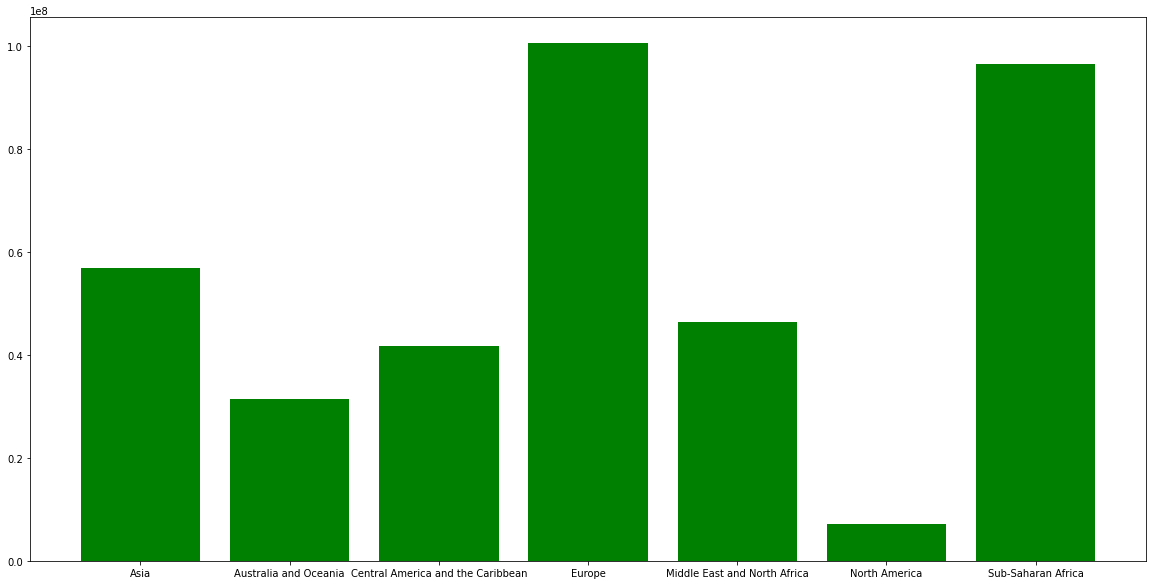

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(region_table.index, region_table['Total Revenue'], color = 'green')
plt.show()

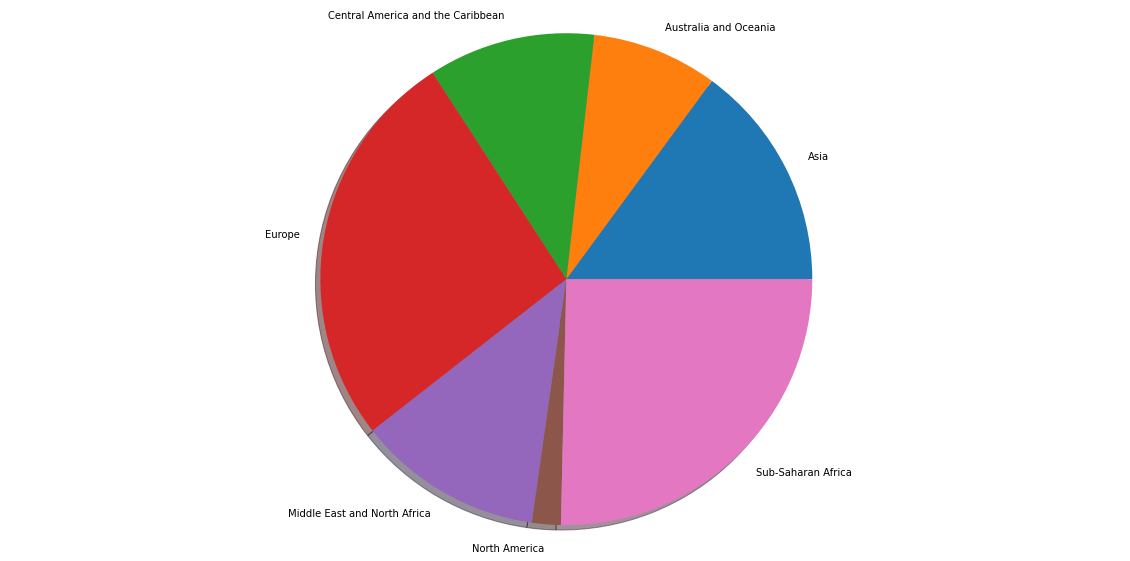

In [ ]:
plt.figure(figsize=(20, 10))

plt.pie( region_table['Total Revenue'],labels= region_table.index, shadow=True)
plt.axis('equal')
plt.show()

### 2. Overall Revenue Trends in which years it increased or decreased.

In [ ]:
year_table = pd.pivot_table(fruits, index = 'Year', values = 'Total Revenue', aggfunc=sum)
year_table

,Total Revenue
Year,
2010,50384565.75
2011,49059985.65
2012,52999876.71
2013,49500240.36
2014,49247248.08
2015,51209934.87
2016,49892594.85
2017,28344138.81


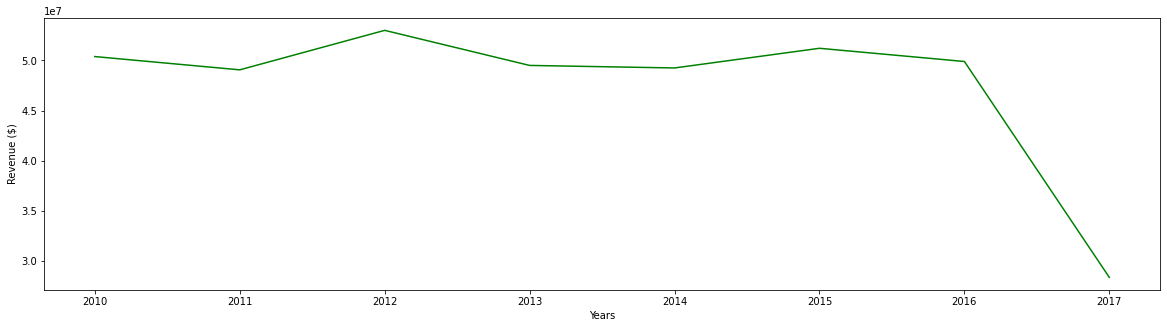

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(year_table.index, year_table['Total Revenue'], color = 'green')
plt.xlabel('Years')
plt.ylabel('Revenue ($)')
plt.show()

In [ ]:
fruits['Month'] = fruits['Order Date'].dt.month 
fruits

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26,2015,12
1,Middle East and North Africa,Turkey,Fruits,Online,C,2012-03-26,772153747,2012-04-07,6307,9.33,6.92,58844.31,43644.44,15199.87,2012,3
2,Sub-Saharan Africa,Cameroon,Fruits,Online,H,2015-12-18,370325791,2016-02-06,6486,9.33,6.92,60514.38,44883.12,15631.26,2015,12
3,Europe,Lithuania,Fruits,Offline,H,2013-05-25,644990861,2013-06-04,5984,9.33,6.92,55830.72,41409.28,14421.44,2013,5
4,North America,Greenland,Fruits,Online,L,2011-07-30,121384179,2011-09-12,9131,9.33,6.92,85192.23,63186.52,22005.71,2011,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8257,Sub-Saharan Africa,Guinea-Bissau,Fruits,Online,H,2014-01-20,167208325,2014-02-20,9514,9.33,6.92,88765.62,65836.88,22928.74,2014,1
8258,Europe,Lithuania,Fruits,Offline,C,2013-08-21,670385587,2013-09-28,847,9.33,6.92,7902.51,5861.24,2041.27,2013,8
8259,Europe,Croatia,Fruits,Online,M,2015-10-15,986272561,2015-10-19,8823,9.33,6.92,82318.59,61055.16,21263.43,2015,10
8260,Asia,Cambodia,Fruits,Online,L,2011-10-23,777176129,2011-11-02,2542,9.33,6.92,23716.86,17590.64,6126.22,2011,10


In [ ]:
df_2017 = fruits.loc[fruits['Year'] == 2017]
df_2017['Month'].unique()

array([7, 1, 5, 3, 4, 2, 6])

### 3.	How many countries are in the dataset, and which one is the highest revenue earner and lowest revenue earner.

In [ ]:
len(fruits['Country'].unique())

185

In [ ]:
country_table = pd.pivot_table(fruits, index = 'Country', values = 'Total Revenue', aggfunc=sum)
country_table= country_table.sort_values('Total Revenue', ascending= True)

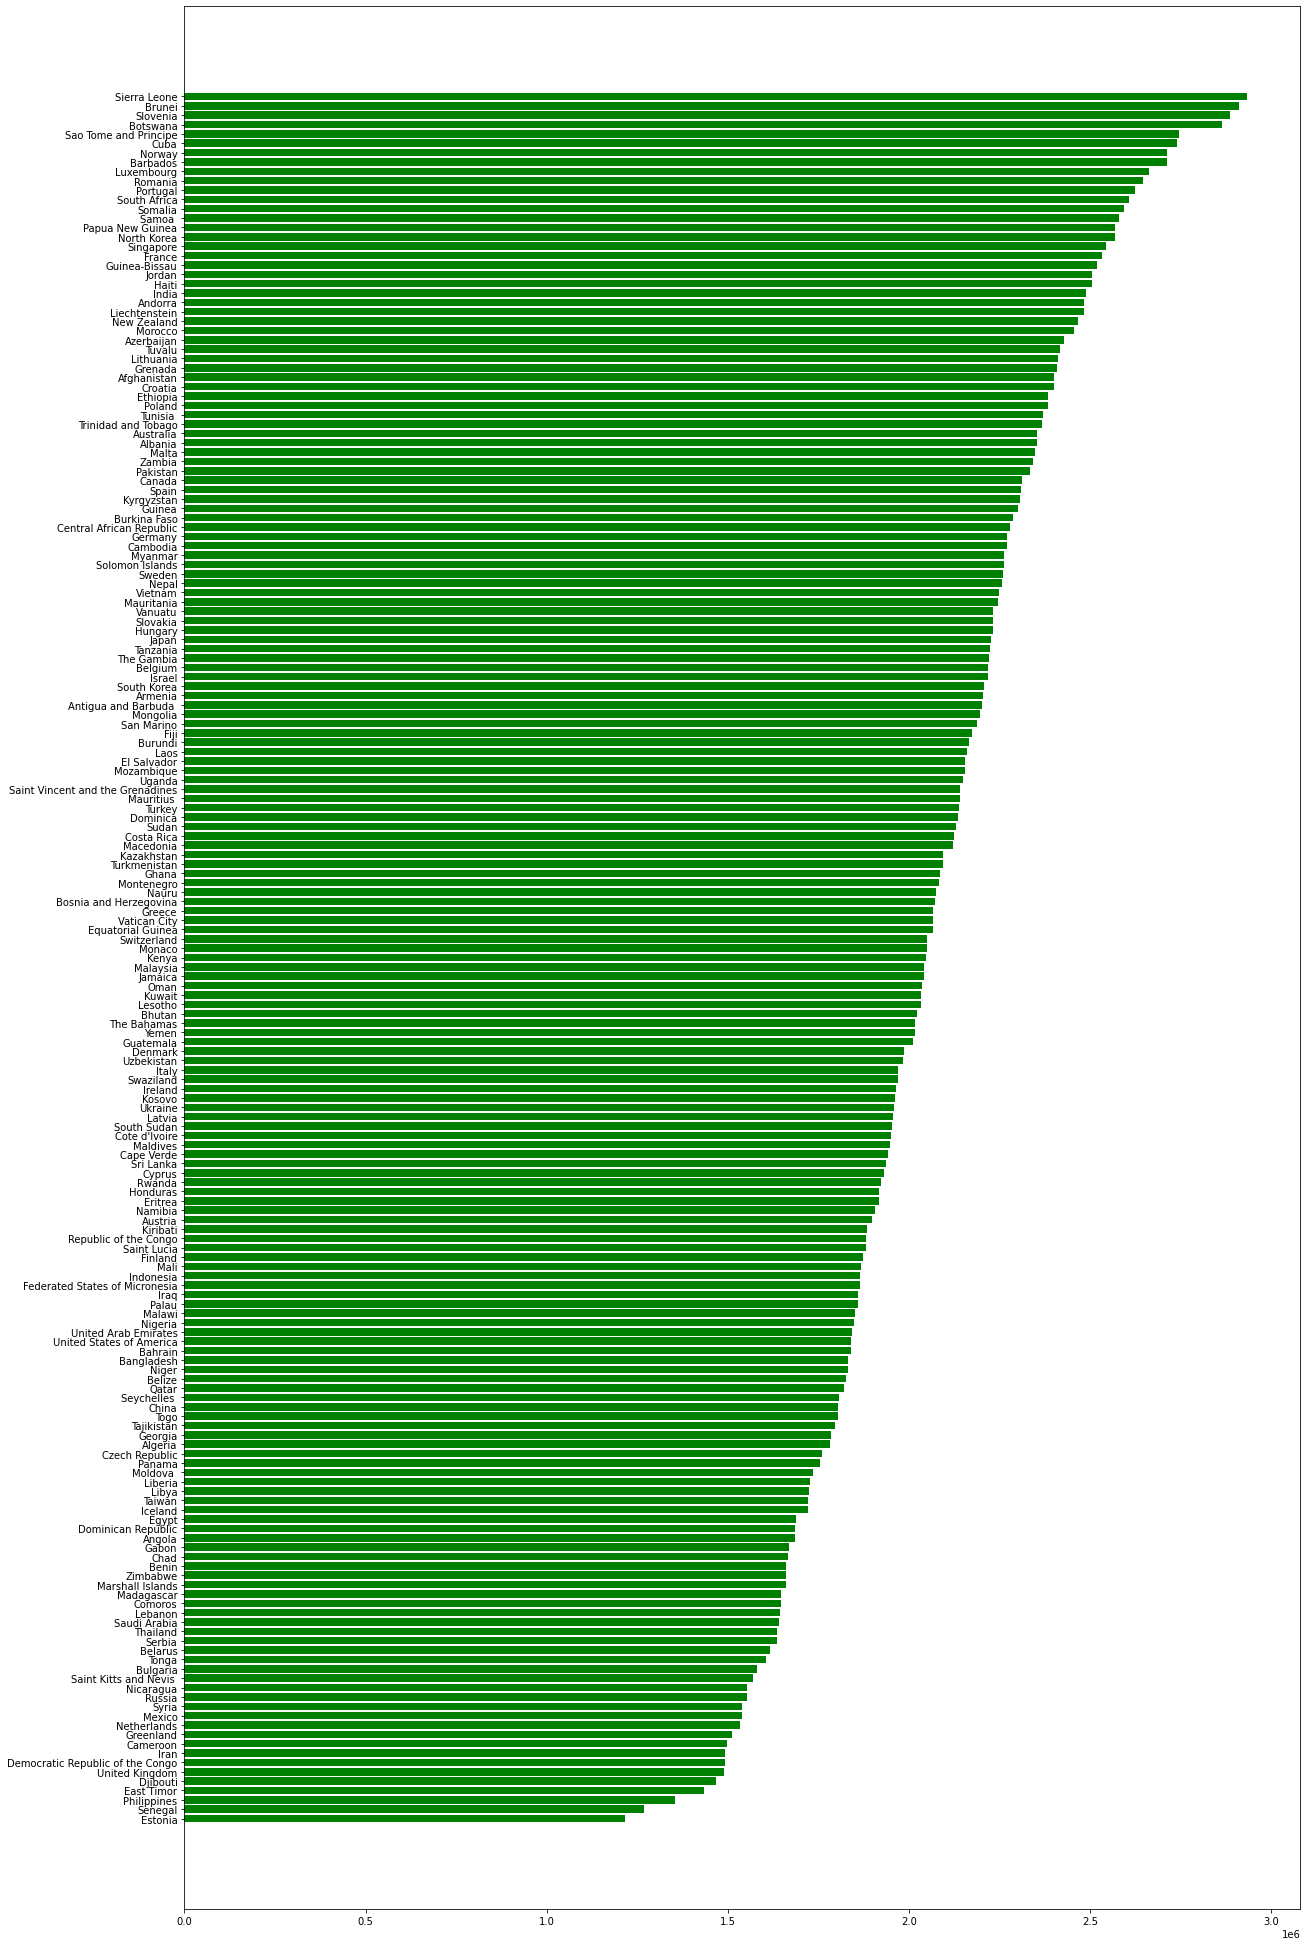

In [ ]:
plt.figure(figsize=(20, 35))
plt.barh(country_table.index, country_table['Total Revenue'], color = 'green')
plt.show()

### 4.	Sales are coming from offline and online channels, the contribution of each channel in total revenue.

In [ ]:
channel_table = pd.pivot_table(fruits, index = 'Sales Channel', values = 'Total Revenue', aggfunc=sum)
channel_table

,Total Revenue
Sales Channel,
Offline,1.900698e+08
Online,1.905688e+08


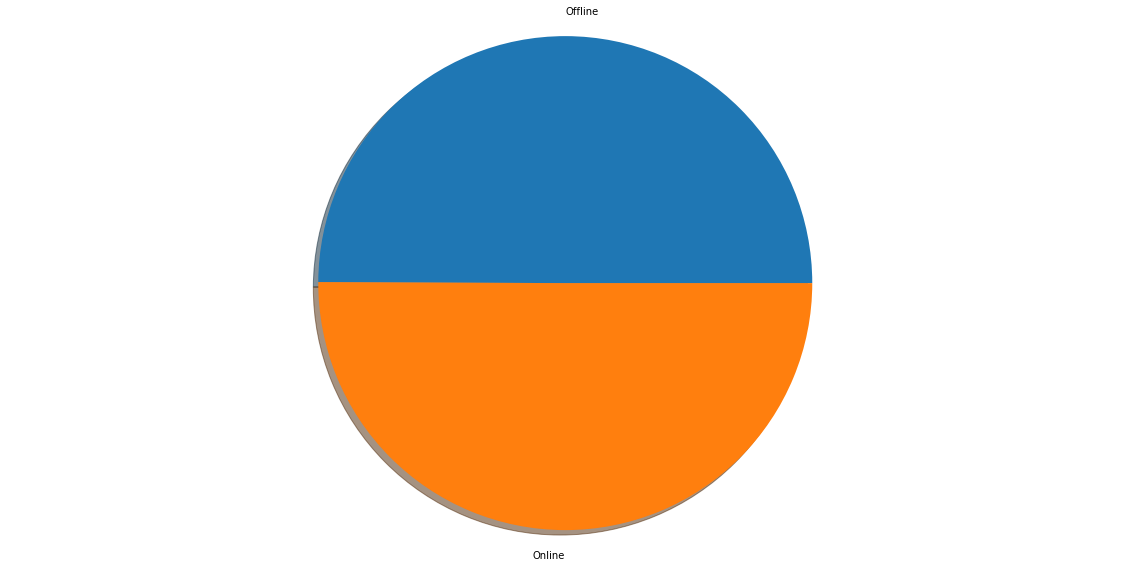

In [ ]:
plt.figure(figsize=(20, 10))
plt.pie( channel_table['Total Revenue'],labels= channel_table.index, shadow=True)
plt.axis('equal')
plt.show()

### 5. Comparison of Regions for Revenue on Year Timeline to see how Region performed compared to others in a given year.

In [ ]:
fruits.index
region_with_year = pd.pivot_table(fruits,index='Year', columns='Region', values='Total Revenue', aggfunc=sum)

In [ ]:
region_with_year

Region,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
Year,,,,,,,
2010,7557682.53,4587075.84,5327224.74,13777732.29,5810714.67,1110046.08,12214089.60
2011,7190658.99,4193200.56,4652479.14,13207044.18,6966244.50,788301.03,12062057.25
2012,6973419.27,4238721.63,6187739.97,14114797.20,5796001.26,910962.54,14778234.84
2013,7313479.11,4438551.57,5512359.93,12878441.58,6017355.51,957696.51,12382356.15
2014,7724922.78,4103735.19,5904742.41,12397228.17,6529124.67,1080320.70,11507174.16
2015,7661525.43,3628269.06,5570317.89,13479396.21,6148470.00,821767.74,13900188.54
2016,7742052.66,3489130.77,5817954.75,13170647.85,5475338.49,910999.86,13286470.47
2017,4627045.56,2768220.33,2790276.45,7488761.82,3679490.76,626210.94,6364132.95


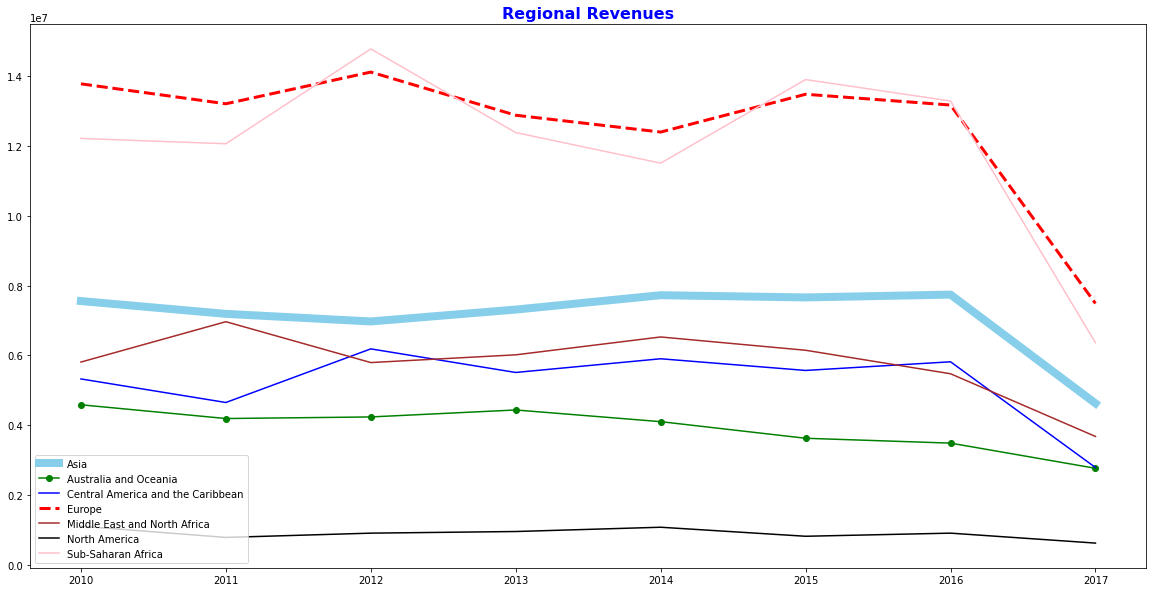

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(region_with_year.index, region_with_year['Asia'], color='skyblue', label = 'Asia', linewidth=8)
plt.plot(region_with_year.index, region_with_year['Australia and Oceania'], color='green', label = 'Australia and Oceania', marker='o')
plt.plot(region_with_year.index, region_with_year['Central America and the Caribbean'], color='blue', label = 'Central America and the Caribbean' )
plt.plot(region_with_year.index, region_with_year['Europe'], color='red', label = 'Europe', linestyle='dashed', linewidth=3)
plt.plot(region_with_year.index, region_with_year['Middle East and North Africa'], color='brown', label = 'Middle East and North Africa')
plt.plot(region_with_year.index, region_with_year['North America'], color='black', label = 'North America')
plt.plot(region_with_year.index, region_with_year['Sub-Saharan Africa'], color='pink', label = 'Sub-Saharan Africa')
plt.legend()
plt.title('Regional Revenues', fontsize=16, fontweight='bold', color = 'blue')
plt.show()

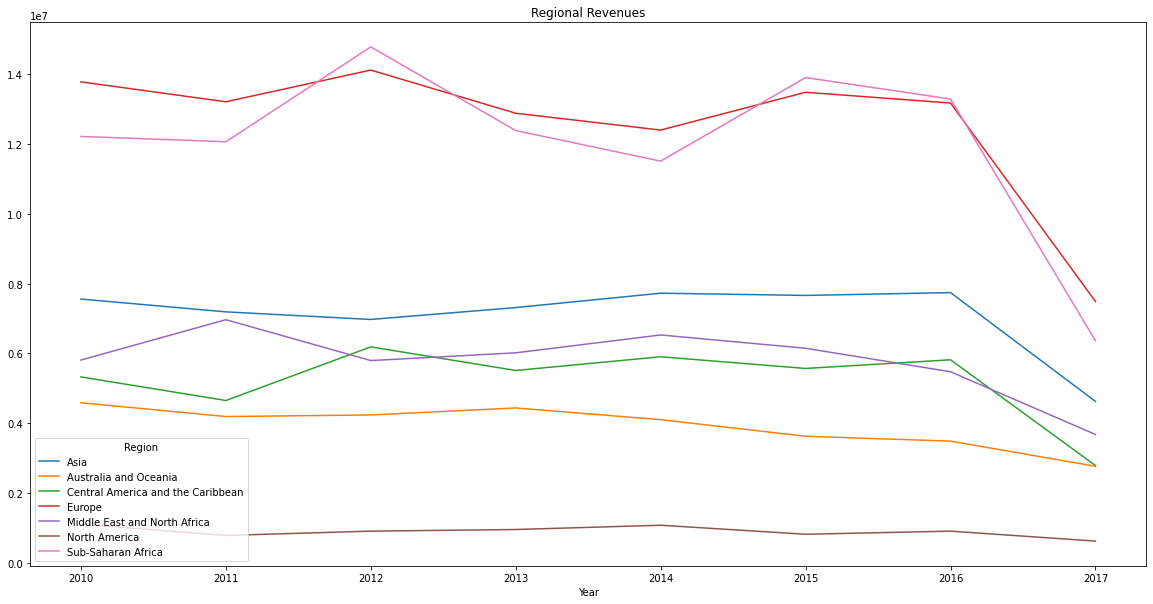

In [ ]:
region_with_year.plot(figsize=(20, 10), title='Regional Revenues');

### 6. Question : Profit Analysis


In [ ]:
region_profit_table = pd.pivot_table(fruits, index = 'Region', values = 'Total Profit', aggfunc=sum)
region_profit_table

,Total Profit
Region,
Asia,14669431.41
Australia and Oceania,8122941.15
Central America and the Caribbean,10787680.56
Europe,25963436.10
Middle East and North Africa,11991297.22
North America,1861435.80
Sub-Saharan Africa,24925212.92


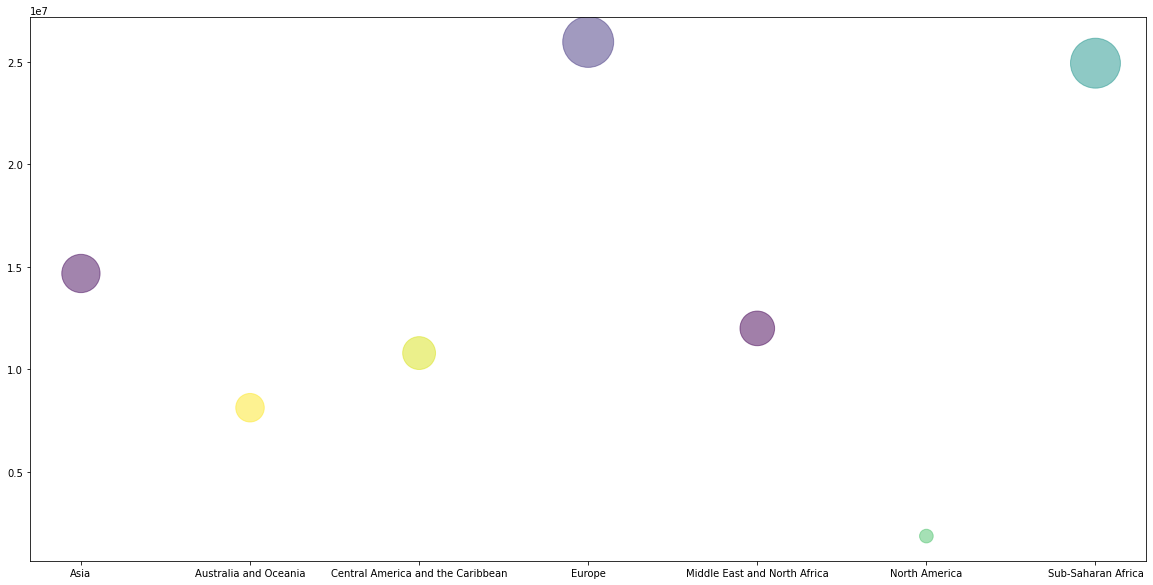

In [ ]:
import numpy as np
plt.figure(figsize=(20, 10))
color = np.random.rand(7)
size = region_profit_table['Total Profit']/10000

# use the scatter function
plt.scatter(region_profit_table.index, 'Total Profit', s=size, c=color, alpha=0.5, data = region_profit_table)
plt.show()
